# Various IBD related Plots

In [2]:
import socket as socket
import os as os
import sys as sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patheffects as pe
from matplotlib import gridspec

socket_name = socket.gethostname()
print(socket_name)

if socket_name.startswith("compute-"):
    print("HSM O2 Computational partition detected.")
    path = "/n/groups/reich/hringbauer/git/punic_aDNA//"  # The Path on Harvard Cluster
else: 
    raise RuntimeWarning("Not compatible machine. Check!!")

os.chdir(path)  # Set the right Path (in line with Atom default)
print(os.getcwd())

#sys.path.append("/n/groups/reich/hringbauer/git/hapBLOCK/python3/") 
from ancIBD.run import hapBLOCK_chrom, run_plot_pair
from ancIBD.plot.plot_karyotype import plot_karyo_from_ibd_df, plot_pde_individual_from_ibd_df

import mpl_toolkits
mpl_toolkits.__path__.append('/n/groups/reich/hringbauer/explore_ntbk/jptvenv37/lib/python3.7/site-packages/basemap-1.2.1-py3.7-linux-x86_64.egg/mpl_toolkits/')
from mpl_toolkits.basemap import Basemap

compute-a-17-95.o2.rc.hms.harvard.edu
HSM O2 Computational partition detected.
/n/groups/reich/hringbauer/git/punic_aDNA


### Sicily - Kerkouene

Filtering to 0.99 GP variants: 0.884x
Filtering to 0.99 GP variants: 0.899x
Filtering to common GP variants: 0.822x
Plotting 88408 markers
Saved to ./output/figures/kerk_sic_ibd/I12847_I24213.post_ch1.pdf


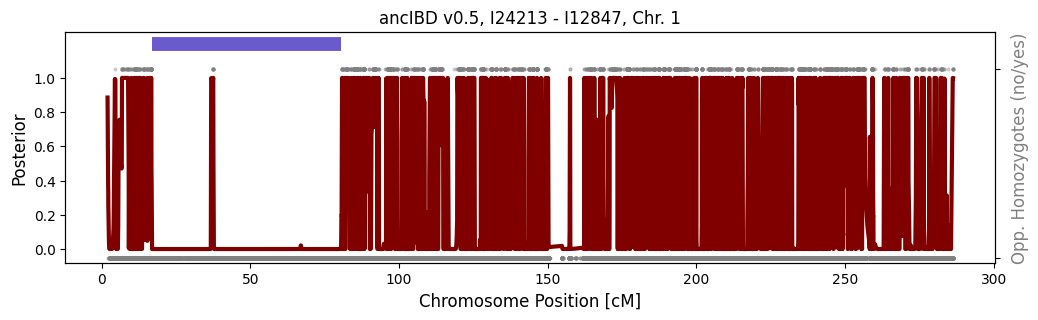

In [3]:
post = run_plot_pair(iids=["I24213", "I12847"], ch=1, xlim=[], ms=2,
                     path_h5='/n/groups/reich/hringbauer/git/hapBLOCK/data/hdf5/1240k_v53.1/ch',
                     min_cm=8, plot=True, l_model="h5", e_model='haploid_gl', max_gap=0.012,
                     p_col="variants/AF_ALL", folder_out="", 
                     path_fig="./output/figures/kerk_sic_ibd/I12847_I24213.post_ch1.pdf", output=False)

Filtering to 0.99 GP variants: 0.855x
Filtering to 0.99 GP variants: 0.876x
Filtering to common GP variants: 0.783x
Plotting 50546 markers
Saved to ./output/figures/kerk_sic_ibd/I12847_I24213.post_ch9.pdf


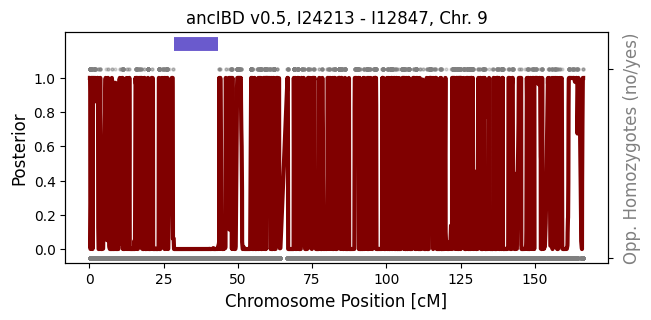

In [4]:
post = run_plot_pair(iids=["I24213", "I12847"], ch=9, xlim=[], ms=2,
                     path_h5='/n/groups/reich/hringbauer/git/hapBLOCK/data/hdf5/1240k_v53.1/ch',
                     min_cm=8, plot=True, l_model="h5", e_model='haploid_gl', max_gap=0.012,
                     p_col="variants/AF_ALL", folder_out="", figsize=(7,3),
                     path_fig="./output/figures/kerk_sic_ibd/I12847_I24213.post_ch9.pdf", output=False)

Filtering to 0.99 GP variants: 0.893x
Filtering to 0.99 GP variants: 0.884x
Filtering to common GP variants: 0.816x
Plotting 28892 markers
Saved to ./output/figures/kerk_sic_ibd/I12847_I24213.post_ch17.pdf


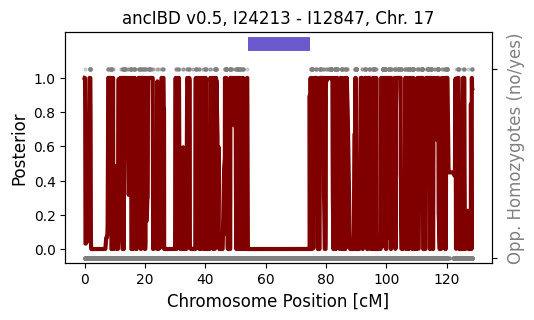

In [5]:
post = run_plot_pair(iids=["I24213", "I12847"], ch=17, xlim=[], ms=2,
                     path_h5='/n/groups/reich/hringbauer/git/hapBLOCK/data/hdf5/1240k_v53.1/ch',
                     min_cm=8, plot=True, l_model="h5", e_model='haploid_gl', max_gap=0.012,
                     p_col="variants/AF_ALL", folder_out="", figsize=(5.5, 3),
                     path_fig="./output/figures/kerk_sic_ibd/I12847_I24213.post_ch17.pdf", output=False)

# Karyotype Plot

Loaded 2311017 IBD segments
Found: 5 Pairs fitting in dataframe.

Saved figure to ./output/figures/kerk_sic_ibd/I12847_I24213.karyo.pdf


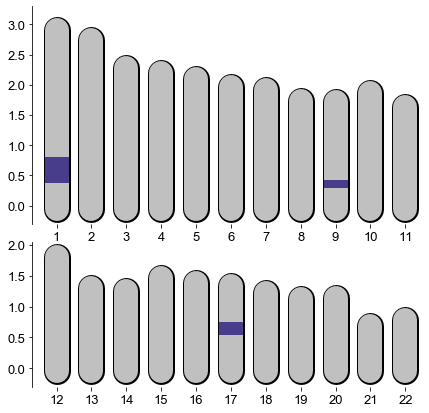

In [58]:
df_ibd = pd.read_csv("/n/groups/reich/hringbauer/git/ibd_euro/output/ibd/ibd220.ibd.v53.1.tsv", sep="\t")
print(f"Loaded {len(df_ibd)} IBD segments")

### Sicily - Tunesia
plot_karyo_from_ibd_df(df_ibd, iids=["I12847", "I24213"], min_cm=8, 
                       savepath="./output/figures/kerk_sic_ibd/I12847_I24213.karyo.pdf")

### Make Small Map

In [6]:
c_ph = "#fb5607"
c_p = "#ffbe0b"
m_sic, s_sic = "*", 3
m_naf, s_naf = "s", 1

t = [["I12847: Birgi \n768-544 calBCE", 37.8000 , 12.4300,  44, -10, -85, "new", c_p , "k", m_sic, s_sic],
     ["I24213: \nKerkouane \n515-392 calBCE", 36.96021373752745, 11.080827687769771, 29, -110, -60, "new", c_p, "k", m_naf, s_naf],
    ]

df = pd.DataFrame(t)
df.columns = ["loc", "lat", "lon", "n_ia", "x", "y", "stat", "c", "c_txt", "m", "s"]

Saved to ./output/figures/kerk_sic_ibd/map.pdf


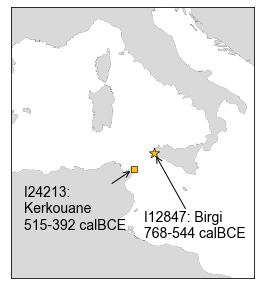

In [10]:
crs=[31, 45, 3, 19]
s=40
s_c=40, 
lw=0.2
lw_c=0.2
ec="k", 
col_cont = "#d9d9d9"
col_lake = "#d9d9d9"
lw_coast=0.5
res="i"
fs_label=14
figsize=(12,11)
states=False
countries=False
ew=0.5,
hspace=0.02
fs=18
savepath="./output/figures/kerk_sic_ibd/map.pdf"

plt.figure(figsize=(10,5))
ax = plt.gca()
m = Basemap(projection='merc', llcrnrlat=crs[0], urcrnrlat=crs[1],\
                llcrnrlon=crs[2], urcrnrlon=crs[3], resolution=res, ax=ax)  # mill
m.fillcontinents(color=col_cont, zorder=0, lake_color=col_lake)
#m.etopo(scale=0.5, alpha=0.4)  # Topological Map
m.drawcoastlines(color='gray', zorder=0, linewidth=lw_coast)
if countries:
    m.drawcountries(color="dimgray")
if states:
    m.drawstates()

### Iterate over Entries on Map
for _, row in df.iterrows():
    lat, lon, c, c_txt, marker, sm = row["lat"], row["lon"], row["c"], row["c_txt"], row["m"], row["s"]
    x,y = m(lon, lat)

    # Split new and old samples
    if row["stat"]=="new":
        ecb = "k"
        ec1 = ec
        lw=0.6    
    else:
        ecb = "white"
        ec1 = "k"
        lw=0.6

    ax.scatter(x, y, c=c, ec=ec1, lw=lw, s=s*sm, marker=marker, zorder=3)

    x_off, y_off = row["x"], row["y"]
    lab, n = row["loc"], row["n_ia"]
    txt = f"{lab}"
    fontc=c_txt

    ax.annotate(txt, xy = [x,y], xycoords='data',
                xytext=(x_off, y_off), textcoords='offset points',
                size=fs_label, color=fontc,
                arrowprops=dict(arrowstyle="->", lw=1,
                               shrinkA = 0, shrinkB = 4))

if len(savepath)>0:
    plt.savefig(savepath, bbox_inches = 'tight', pad_inches = 0)
    print(f"Saved to {savepath}")    

plt.show()

# B) Supp. Figure: IBD T774 - Malaga

# Area 51
Try out code here

In [6]:
df_target = give_sub_df(df_ibd, pop1=iid1, pop2=iid2, col="iid")

Found: 3 Pairs of Individuals with IBD stats.

